## Univariate feature selection

Univariate feature selection works by selecting the best features based on univariate statistical tests (ANOVA). The methods estimate the degree of linear dependency between two random variables. In this case, any of the predictor variables and the target. 

ANOVA assumes a linear relationship between the feature and the target and that the variables follow a Gaussian distribution. If this is not true, the result of this test may not be useful.

These may not always be the case for the variables in your dataset, so if looking to implement these procedure, you will need to corroborate these assumptions.

I will demonstrate how to select features based on univariate tests using sklearn with a regression and classification dataset.

For the sake of the demonstration, I will assume that the variables show a linear relationship with the target and that they are normally distributed.

In [80]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# to determine the p-values with anova
from sklearn.feature_selection import f_classif, f_regression
from sklearn.metrics import roc_auc_score, f1_score, precision_score,recall_score, accuracy_score
# to select features
from sklearn.feature_selection import SelectKBest, SelectPercentile

## Classification

In [132]:
# load dataset
data = pd.read_csv('C:/Users/RAJENDRA REDDY/Downloads/Genre4.csv')
data.shape

(201, 36)

In [126]:
data.head()

,chroma_stft_min,chroma_stft_max,chroma_cqt_min,chroma_cqt_max,chroma_cens_min,chroma_cens_max,melspectogram_min,melspectogram_max,mfcc_min,mfcc_max,...,zero_crossing_rate_min,zero_crossing_rate_max,tempogram_min,tempogram_max,delta_mfcc_min,delta_mfcc_max,mel_to_stft_min,mel_to_stft_max,class,song
0,0.001252,1,0.028087,1,0.0,0.797361,4.850000e-11,1608.1553,-313.89453,158.97940,...,0.020020,0.506348,-3.180000e-16,1,-26.059307,44.195885,0,12.531638,1,Sab Qatl Ho Ke Tere_shortened.wav
1,0.001236,1,0.049233,1,0.0,0.710122,4.100000e-07,4487.7754,-211.82755,155.29317,...,0.013672,0.575684,-3.120000e-16,1,-20.617844,25.392746,0,16.328250,1,Sabab Tayana Kuthali Sangu_shortened.wav
2,0.000164,1,0.009047,1,0.0,0.772206,1.300000e-08,1190.8945,-370.22098,230.16904,...,0.017090,0.085449,-4.120000e-16,1,-16.024027,19.057417,0,11.388083,1,Sabhi Andaz E Husn Pyare Hain (pyar)_shortened...
3,0.001763,1,0.034657,1,0.0,0.670851,2.150000e-08,2198.9436,-284.60513,200.24591,...,0.023926,0.507812,-3.580000e-16,1,-31.472502,32.328354,0,13.543420,1,Sabko Maloom Hai Main Sharabi Nahin_shortened.wav
4,0.001074,1,0.017001,1,0.0,0.755667,1.680000e-08,2149.3972,-344.30637,203.72919,...,0.017090,0.705078,-2.810000e-16,1,-28.704193,35.110043,0,14.551949,1,Sach Bolta Hoon Main_shortened.wav


**Important**

In all feature selection procedures, it is good practice to select the features by examining only the training set. And this is to avoid overfit.

In [133]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['class','song'], axis=1),
    data['class'],
    test_size=0.3,
    random_state=0)

### Perform univariate anova

In [134]:
# calculate the univariate statistical measure between
# each of the variables and the target

# similarly to chi2, the output is one array with f-scores
# and one array with the pvalues

univariate = f_classif(X_train, y_train)

univariate

c:\users\rajendra reddy\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)


(array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan]),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan]))

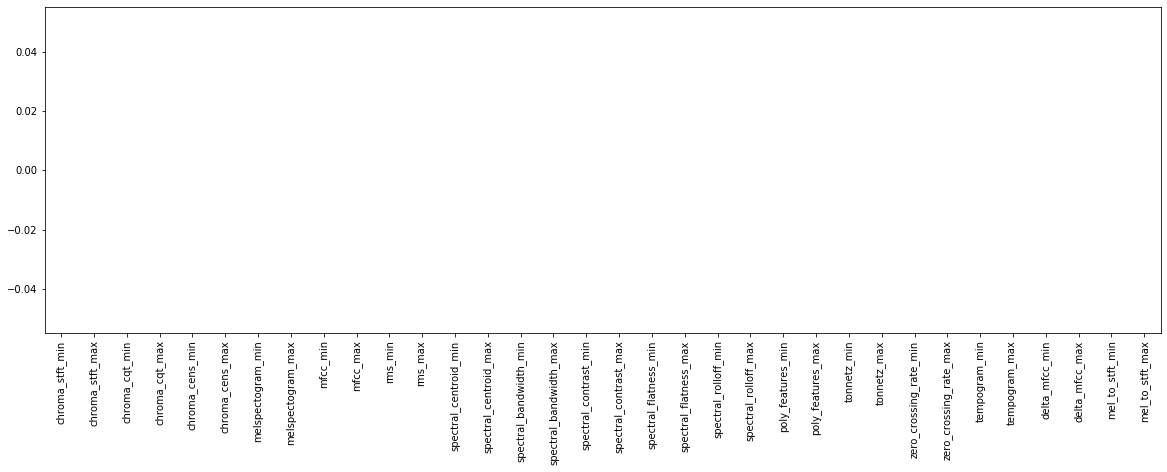

In [135]:
# 1) let's capture the pvalues in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on their anova pvalues
# 4) and make a var plot

univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False).plot.bar(figsize=(20, 6))

The smaller the p_value the more predictive the feature is.

Features on the left of the plot are very bad at predicting the target. The most predictive features are on the right of the plot.

**How can we select features based on the anova p-values?**

There are a few ways in which this can be done:

- Select top k features, where k is an arbitrary number of features

- Select features in the top n percentile, where n is again an arbitrary number

- Select all features below a certain threshold, arbitrarily decided.

Scikit-learn transformer **SelectKBest**, allows us to automatically select the top k features, based of any statistical value, including Anova. It will select those with the lowest pvalues.

Sklearn's **SelectPercentile** allows us to select the features in the top percentile of any statistical value, including the anova.

Alternatively, if we want to select features based on a pvalue threshold, we can do it manually.

### Select top 10 features based of univariate anova

In [136]:
# select the top 10 features
sel_ = SelectKBest(f_classif, k=10).fit(X_train, y_train)

# display selected feature names
X_train.columns[sel_.get_support()]
selected_features = X_train.columns[sel_.get_support()]
selected_features

c:\users\rajendra reddy\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)


Index(['tonnetz_min', 'tonnetz_max', 'zero_crossing_rate_min',
       'zero_crossing_rate_max', 'tempogram_min', 'tempogram_max',
       'delta_mfcc_min', 'delta_mfcc_max', 'mel_to_stft_min',
       'mel_to_stft_max'],
      dtype='object')

In [87]:
trainy, testy = y_train, y_test
# define outlier detection model
trainX = X_train[selected_features]
testX =  X_test[selected_features]

In [106]:
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score
from sklearn.svm import OneClassSVM
from sklearn.metrics import precision_score, recall_score, accuracy_score
# generate dataset

# split into train/test sets

model = OneClassSVM(gamma='scale', nu=0.02)
# fit on majority class

model.fit(trainX)
# detect outliers in the test set
yhat = model.predict(trainX)
# mark inliers 1, outliers -1

# calculate score

print('Accuracy Score: %.3f' % accuracy_score(y_train, yhat))
print('F1 Score: %.3f' % f1_score(y_train, yhat, pos_label=1))
print('Precision Score: %.3f' % precision_score(y_train, yhat, average='micro'))
print('Recall Score: %.3f' % recall_score(y_train, yhat, average='micro'))

Accuracy Score: 0.972
F1 Score: 0.986
Precision Score: 0.972
Recall Score: 0.972


In [105]:
# elliptic envelope for imbalanced classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.covariance import EllipticEnvelope
# generate dataset

# define outlier detection model
model = EllipticEnvelope(contamination=0.1)
# fit on majority class

model.fit(trainX)
# detect outliers in the test set
yhat = model.predict(trainX)
# mark inliers 1, outliers -1

# calculate score
score = f1_score(y_train, yhat, pos_label=1)
print('Accuracy Score: %.3f' % accuracy_score(y_train, yhat))
print('F1 Score: %.3f' % f1_score(y_train, yhat, pos_label=1))
print('Precision Score: %.3f' % precision_score(y_train, yhat, average='micro'))
print('Recall Score: %.3f' % recall_score(y_train, yhat, average='micro'))

Accuracy Score: 0.894
F1 Score: 0.944
Precision Score: 0.894
Recall Score: 0.894


c:\users\rajendra reddy\appdata\local\programs\python\python37\lib\site-packages\sklearn\covariance\_robust_covariance.py:647: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "


In [101]:
# isolation forest for imbalanced classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import IsolationForest
# generate dataset

# split into train/test sets

# define outlier detection model
model = IsolationForest(contamination=0.05)
# fit on majority class

model.fit(trainX)
# detect outliers in the test set
yhat = lof_predict(model,testX,trainX)
# mark inliers 1, outliers -1

# calculate score
score = f1_score(trainy, yhat, pos_label=1)
print('Accuracy Score: %.3f' % accuracy_score(y_train, yhat))
print('F1 Score: %.3f' % f1_score(y_train, yhat, pos_label=1))
print('Precision Score: %.3f' % precision_score(y_train, yhat, average='micro'))
print('Recall Score: %.3f' % recall_score(y_train, yhat, average='micro'))

Accuracy Score: 0.958
F1 Score: 0.978
Precision Score: 0.958
Recall Score: 0.958


In [104]:
# local outlier factor for imbalanced classification
from numpy import vstack
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.neighbors import LocalOutlierFactor

# make a prediction with a lof model
def lof_predict(model, trainX, testX):
	# create one large dataset
	composite = vstack((trainX, testX))
	# make prediction on composite dataset
	yhat = model.fit_predict(composite)
	# return just the predictions on the test set
	return yhat[len(trainX):]

# generate dataset

# split into train/test sets

# define outlier detection model
model = LocalOutlierFactor(contamination=0.01)
# get examples for just the majority class

# detect outliers in the test set
yhat = lof_predict(model,testX,trainX)
# mark inliers 1, outliers -1

# calculate score
score = f1_score(trainy, yhat, pos_label=1)

print('Accuracy Score: %.3f' % accuracy_score(y_train, yhat))
print('F1 Score: %.3f' % score)
print('Precision Score: %.3f' % precision_score(y_train, yhat, average='micro'))
print('Recall Score: %.3f' % recall_score(y_train, yhat, average='micro'))

Accuracy Score: 0.993
F1 Score: 0.996
Precision Score: 0.993
Recall Score: 0.993


In [71]:
X_train = X_train[selected_features]
X_test =  X_test[selected_features]
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict_proba(X_train)


print('Precision Score: %.3f' % precision_score(y_train, y_pred, average='weighted'))
                                               
print('Recall Score: %.3f' % recall_score(y_train, y_pred, average=None))



Precision Score: 1.000
Recall Score: 1.000


In [11]:
# remove unwanted features from the dataset

X_train = X_train[selected_features]
X_test =  X_test[selected_features]
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict_proba(X_train)
print('Ada Boost roc-auc: {}'.format(roc_auc_score(y_train, y_pred,multi_class="ovo")))


clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
  max_depth=1, random_state=0).fit(X_train, y_train)

clf = clf.fit(X_train,y_train)
y_pred = clf.predict_proba(X_train)
print('GradientBoostingClassifier roc-auc: {}'.format(roc_auc_score(y_train, y_pred,multi_class="ovo")))


clf = HistGradientBoostingClassifier(max_iter=100).fit(X_train, y_train)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict_proba(X_train)
print('HistGradientBoostingClassifier roc-auc: {}'.format(roc_auc_score(y_train, y_pred,multi_class="ovo")))


clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,
     min_samples_split=2, random_state=0)

clf = clf.fit(X_train,y_train)
y_pred = clf.predict_proba(X_train)
print('ExtraTreesClassifier roc-auc: {}'.format(roc_auc_score(y_train, y_pred,multi_class="ovo")))

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(
     estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
     voting='soft')

params = {'lr__C': [1.0, 100.0], 'rf__n_estimators': [20, 200]}

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
grid = grid.fit(X_train,y_train)
y_pred = grid.predict_proba(X_train)
print('Voting Classifier roc-auc: {}'.format(roc_auc_score(y_train, y_pred,multi_class="ovo")))

clf = DecisionTreeClassifier(criterion="entropy", max_depth=9)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict_proba(X_train)
print("Decision Tree Accuracy:",roc_auc_score(y_train, y_pred,multi_class="ovo"))

clf = BaggingClassifier(base_estimator=SVC(),
                        n_estimators=10, random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict_proba(X_train)
print('BaggingClassifier roc-auc: {}'.format(roc_auc_score(y_train, y_pred,multi_class="ovo")))

clf = KNeighborsClassifier(n_neighbors = 5)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict_proba(X_train)

print("KNN {}nn score: {}",roc_auc_score(y_train, y_pred,multi_class="ovo"))

clf = GaussianNB()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict_proba(X_train)
print("Accuracy of Naive Bayes Algo: ", roc_auc_score(y_train, y_pred,multi_class="ovo"))


nca = NeighborhoodComponentsAnalysis(random_state=42)
n = []
for i in range(500):
    
    knn = KNeighborsClassifier(n_neighbors=i+1)
    clf = Pipeline([('nca', nca), ('knn', knn)])
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict_proba(X_train)
    n.append(roc_auc_score(y_train, y_pred,multi_class="ovo"))
print("Accuracy of NeighborhoodComponentsAnalysis:",max(n))



clf = MLPClassifier(random_state=1, max_iter=600).fit(X_train, y_train)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict_proba(X_train)
print("Accuracy of MLPClassifier",roc_auc_score(y_train, y_pred,multi_class="ovo"))

Ada Boost roc-auc: 0.7971539240048061
GradientBoostingClassifier roc-auc: 0.9566183389363416
HistGradientBoostingClassifier roc-auc: 1.0
ExtraTreesClassifier roc-auc: 1.0


c:\users\rajendra reddy\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\rajendra reddy\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options

Voting Classifier roc-auc: 0.9638015976466996
Decision Tree Accuracy: 0.9910355861774723
BaggingClassifier roc-auc: 0.6911553886678737
KNN {}nn score: {} 0.8801447939250828
Accuracy of Naive Bayes Algo:  0.7600956819748548
Accuracy of NeighborhoodComponentsAnalysis: 1.0
Accuracy of MLPClassifier 0.7423122635057255


## Regression

In [9]:
# load dataset
data = pd.read_csv('../houseprice.csv')
data.shape

(1460, 81)

In [10]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [11]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

### Perform univariate anova

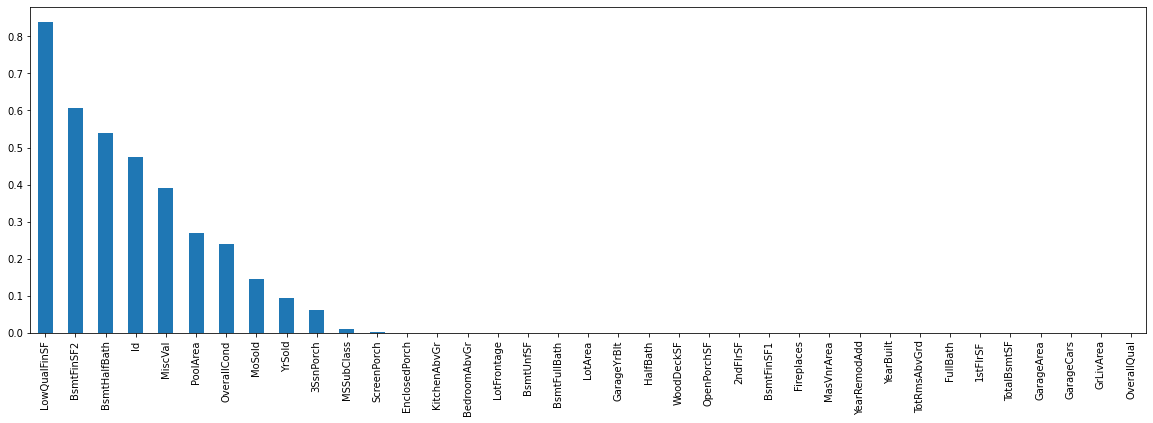

In [12]:
# univariate anova
univariate = f_regression(X_train.fillna(0), y_train)

# plot values
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False).plot.bar(figsize=(20,6))

### Select features in top 10th percentile

In [13]:
# select features in top 10th percentile
sel_ = SelectPercentile(f_regression,
                        percentile=10).fit(X_train.fillna(0), y_train)

# display selected feature names
X_train.columns[sel_.get_support()]

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')

In [14]:
# select features / discard unwanted features

X_train = sel_.transform(X_train.fillna(0))
X_train.shape

(1022, 4)

I rarely use these methods to select features. But, I wanted to have them covered in the course so you can play aroundand see if you find them useful.

That is all for this lecture, I hope you enjoyed it and see you in the next one!